## Business Problem: Understanding the Cab Industry Market to make an investment

### Introduction
XYZ, a private firm in the US, is considering an investment in the Cab industry. To inform their decision, I aim to analyze the market trends using data-driven insights.

### Steps to Analyze the Market

#### Step 1: Exploratory Data Analysis (EDA)
Performed basic EDA to understand the dataset:
- Checked for null values, missing data, data types, and duplicates.

#### Step 2: Data Integration
Merged multiple datasets using appropriate foreign keys (city, customerid, transactionid).

#### Step 3: Feature Engineering
Enhanced the dataset by adding relevant columns to facilitate visualizations and trend analysis.

#### Step 4: Hypothesis Testing
Conducted hypothesis testing to validate assumptions and draw statistical conclusions.

## Importing Required Libraires


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

## Reviewing Each Dataset Before Merging

Since we have only four files, I am reviewing each one before merging. Otherwise, I would have merged the files first and conducted my analysis later.

### General Checks for All Datasets
1. **Load**: Load each dataset into the analysis environment.
2. **Datatype**: Verify and ensure correct data types for all columns.
3. **Null Values**: Check for any missing values and handle them appropriately.
4. **Duplicate Values**: Identify and address any duplicate records in the datasets.


**Dataset-1**

In [2]:
df_city=pd.read_csv("C:/Users/Sainad/DGVI/Data_Glacier_Intership_2024/WEEK-2/DataSets/City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [3]:
df_city.shape

(20, 3)

In [4]:
#Checking dattypes
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [5]:
#Sum of Null_values
df_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [6]:
#data type conversion
df_city['Population'] = df_city['Population'].str.replace(',', '').astype('float')
df_city['Users'] = df_city['Users'].str.replace(',', '').astype('float')

In [7]:
#Count of duplicated rows
df_city[df_city.duplicated()].shape

(0, 3)

In [8]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


**Dataset-2**

In [9]:
df_Transc=pd.read_csv("C:/Users/Sainad/DGVI/Data_Glacier_Intership_2024/WEEK-2/DataSets/Transaction_ID.csv")
df_Transc.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
df_Transc.shape

(440098, 3)

In [11]:
#Checking dattypes
df_Transc.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [12]:
#Sum of Null_values
df_Transc.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [13]:
#Count of duplicated rows
df_Transc[df_Transc.duplicated()].shape

(0, 3)

In [14]:
df_Transc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


**Dataset-3**

In [15]:
df_Cust=pd.read_csv("C:/Users/Sainad/DGVI/Data_Glacier_Intership_2024/WEEK-2/DataSets/Customer_ID.csv")
df_Cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
df_Cust.shape

(49171, 4)

In [17]:
#Checking dattypes
df_Cust.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [18]:
#Sum of Null_values
df_Cust.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [19]:
#Count of duplicated rows
df_Cust[df_Cust.duplicated()].shape

(0, 4)

In [20]:
df_Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


**Dataset-4**

In [21]:
df_Cab=pd.read_csv("C:/Users/Sainad/DGVI/Data_Glacier_Intership_2024/WEEK-2/DataSets/Cab_Data.csv")
df_Cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [22]:
df_Cab.shape

(359392, 7)

In [23]:
#Checking dattypes
df_Cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [24]:
#Sum of Null_values
df_Cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

## Data Type Conversion for Date of Travel

We need to convert the 'Date of Travel' column to the required data type. We have two approaches to achieve this:

1. **Manual Conversion in Excel**:
   - Open the Excel file containing the dataset.
   - Locate the 'Date of Travel' column.
   - Change the data type directly in Excel to the required format (e.g., date format).

2. **Programmatic Conversion in Python**:
   - Load the dataset into Python using pandas.
   - Convert the 'Date of Travel' column to the desired data type using  functions.

In [25]:
#function to convert date column
def excel_serial_to_date(serial):
    base_date = datetime.datetime(1900, 1, 1)
    return base_date + datetime.timedelta(days=serial - 2)
df_Cab['Date of Travel']=df_Cab['Date of Travel'].apply(excel_serial_to_date)

In [26]:
#Count of duplicated rows
df_Cab[df_Cab.duplicated()].shape

(0, 7)

In [27]:
df_Cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


## Merging Files Using Foreign Keys

After confirming that there are no missing values, null values, or duplicates in the datasets, we proceed to merge all files using their respective foreign keys.


In [28]:
merged_df = df_Cab.merge(df_city, on='City').merge(df_Transc, on='Transaction ID').merge(df_Cust, on='Customer ID')

In [29]:
#sorting values according to tranacrion id and reseting the index
merged_df.sort_values(by=['Transaction ID'],ascending=True).reset_index(drop=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885.0,24701.0,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885.0,24701.0,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885.0,24701.0,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859.0,127001.0,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859.0,127001.0,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859.0,127001.0,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859.0,127001.0,52175,Card,Male,32,6423


In [30]:
#adding extra rows for further analysis
merged_df['Year'] =merged_df['Date of Travel'].dt.to_period('Y')
merged_df['month_name'] =merged_df['Date of Travel'].dt.month_name()
merged_df["Profit"] = merged_df["Price Charged"] - merged_df["Cost of Trip"]
merged_df['price per KM']=merged_df['Price Charged'] / merged_df['KM Travelled']
merged_df['profit per KM'] = merged_df['Profit'] / merged_df['KM Travelled']

In [31]:
merged_df.shape

(359392, 19)

In [32]:
merged_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Profit,price per KM,profit per KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,19191.652115,35.336705,15048.822937,137.253198,18.765127,6.083579
std,1.268058e+05,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,21012.412463,12.594234,7969.409482,160.311840,5.878560,5.543493
min,1.000001e+07,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,1.000000,18.000000,2000.000000,-220.060000,6.338621,-4.998235
25%,1.011081e+07,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,2705.000000,25.000000,8424.000000,28.012000,14.451327,2.000385
50%,1.022104e+07,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,7459.000000,33.000000,14685.000000,81.962000,17.153501,4.466809
75%,1.033094e+07,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,36078.000000,42.000000,21035.000000,190.030000,22.234926,9.170006
max,1.044011e+07,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,60000.000000,65.000000,35000.000000,1463.966000,53.955556,41.115556


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  float64       
 8   Users               359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [34]:
#Count of duplicated rows
merged_df[merged_df.duplicated()].shape

(0, 19)


## Visualization and Further Analysis

After merging the datasets and confirming the absence of null values, duplicates, and invalid entries, we proceed to visualize the data and conduct further analysis.


## Checking Correlation

To understand relationships between variables in the dataset, we'll check the correlation coefficients:

### Steps:
1. **Compute Correlation**: Calculate the correlation coefficients between  variables.
2. **Visualize Correlation**: Create a heatmap to visualize the correlations.

In [35]:
corr=merged_df.corr()
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Profit,price per KM,profit per KM
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,0.023868,0.013526,-0.016912,-0.001267,-0.001570,-0.087130,-0.106457,-0.110524
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.002311,-0.000428,0.000389,-0.000369,-0.000544,0.462768,-0.000474,-0.000538
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.326589,0.281061,-0.177324,-0.003084,0.003228,0.864154,0.482493,0.473222
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.015108,0.023628,0.003077,-0.000189,-0.000633,0.486056,0.062429,0.031053
Population,0.023868,-0.002311,0.326589,0.015108,1.000000,0.915490,-0.647052,-0.009002,0.011868,0.544079,0.681364,0.700522
Users,0.013526,-0.000428,0.281061,0.023628,0.915490,1.000000,-0.610742,-0.005906,0.010464,0.457758,0.584375,0.589299
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.647052,-0.610742,1.000000,-0.004735,-0.013608,-0.306527,-0.368361,-0.394133
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.009002,-0.005906,-0.004735,1.000000,0.003907,-0.005093,-0.006039,-0.006428
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.011868,0.010464,-0.013608,0.003907,1.000000,0.006148,0.007632,0.008159
Profit,-0.087130,0.462768,0.864154,0.486056,0.544079,0.457758,-0.306527,-0.005093,0.006148,1.000000,0.764276,0.779330


Text(69.0, 0.5, 'Variables')

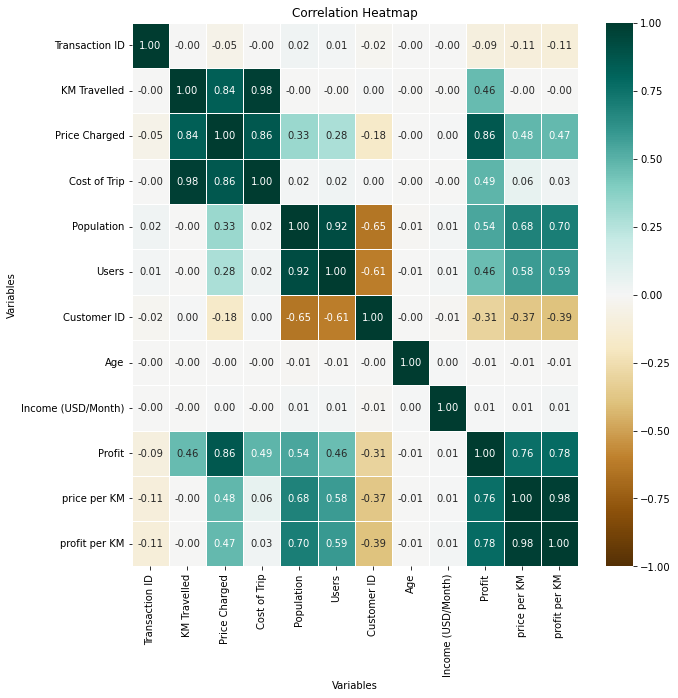

In [36]:
f,ax = plt.subplots(figsize=(10, 10))
# Creating the heatmap using seaborn's heatmap function
sns.heatmap(data=corr, cmap="BrBG",annot=True,fmt=".2f", linewidths=0.5, ax=ax,vmin=-1, vmax=1)
# Set the title and labels for the heatmap
ax.set_title('Correlation Heatmap')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')

## Number of Cities Using Cab Services

By examining the merged dataset, we find that there are 19 unique cities utilizing these cab services.


In [37]:
merged_df.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Population                19
Users                     19
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Year                       3
month_name                12
Profit                301825
price per KM          333994
profit per KM         356065
dtype: int64

## Distribution of Cab Companies

Visualizing the distribution of cab companies based on the merged dataset

#### Market Share Analysis

From the distribution of cab companies visualized in the pie chart, it's evident that Yellow Cab owns the majority of the market share.


<AxesSubplot:ylabel='Company'>

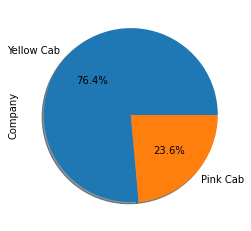

In [38]:
#company distribution
merged_df["Company"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True)

## Analysis of Booking Trends and Cab Preference

### Monthly Booking Trends

These visualizations and analyses provide insights into booking trends across months and user preferences for cab companies.It's observed that December has the highest number of bookings, while February has the lowest.


<AxesSubplot:ylabel='Users'>

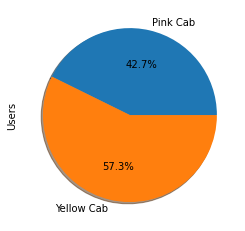

In [39]:
#user
x=merged_df.groupby(["Company"])["Users"].mean()
x.plot(kind="pie",autopct="%1.1f%%",shadow=True)

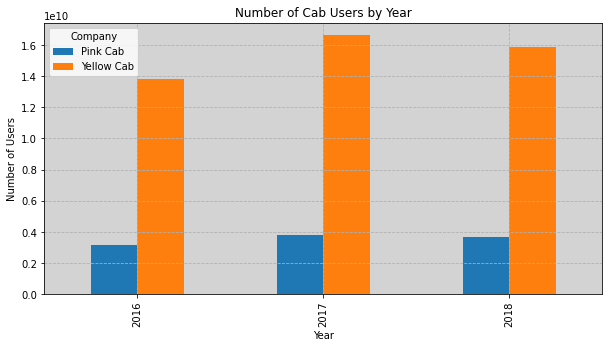

In [40]:
Year_users = merged_df.groupby(['Year', 'Company'])['Users'].sum().reset_index()

# Pivot the data for easier comparison
pivot_users = Year_users.pivot(index='Year', columns='Company', values='Users')

# Plot the data
fig,ax=plt.subplots(figsize=(10, 5))
pivot_users.plot(kind='bar',ax=ax)
plt.title('Number of Cab Users by Year')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend(title='Company')
plt.grid(ls='--')
plt.gca().set_facecolor('LightGrey')

plt.show()

<AxesSubplot:>

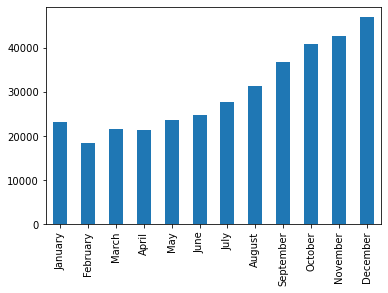

In [41]:
#number of booking in each month?
import calendar
merged_df['month_name'] = pd.Categorical(merged_df['month_name'], categories=list(calendar.month_name[1:]), ordered=True)
merged_df['month_name'].value_counts().sort_index().plot(kind='bar')


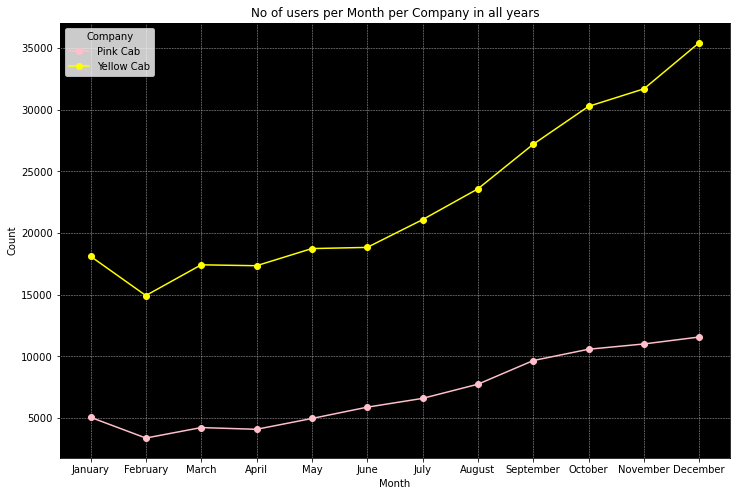

In [42]:
grouped = merged_df.groupby(['Company', 'month_name']).size().unstack(fill_value=0)

# Plotting the line chart
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Set background color
plt.gca().set_facecolor('Black')

# Plot lines for each company
index = range(len(grouped.columns))

plt.plot(index, grouped.loc['Pink Cab'], label='Pink Cab', color='pink', marker='o')
plt.plot(index, grouped.loc['Yellow Cab'], label='Yellow Cab', color='Yellow', marker='o')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('No of users per Month per Company in all years')
plt.xticks(index, grouped.columns)  # Set x-axis labels to be month names
plt.legend(title='Company')

# Display the plot
plt.show()


## Distribution of Kilometers Travelled

Visualizing the distribution of kilometers travelled using a histogram.Based on the histogram depicting kilometers travelled:

- The majority of cab rides range approximately from 2 km to 48 km.

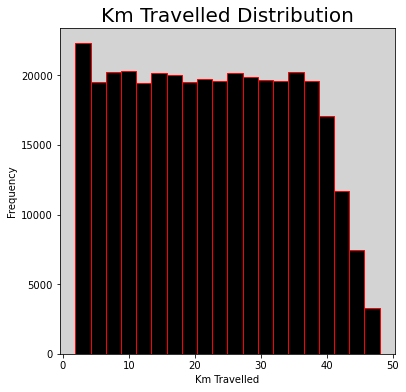

In [43]:
plt.figure(figsize=(6,6))
plt.hist(merged_df['KM Travelled'],facecolor ="black",edgecolor ="red",bins =20)
#creates histogram with 20 bins and colours filled init.
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.gca().set_facecolor('LightGrey')


# Profit Margins

(`Distribution of Profits`) - Visualizing the distribution of profits from cab services.Based on the histogram depicting profit distribution:
- The majority of profits fall within the range of approximately 10 to 140.

(`Pricing Analysis`) -To determine which company charges more or less
- On average, Yellow Cab charges higher fares and earns more profits compared to Pink Cab.However, Pink Cab offers cheaper fares in comparison to Yellow Cab.


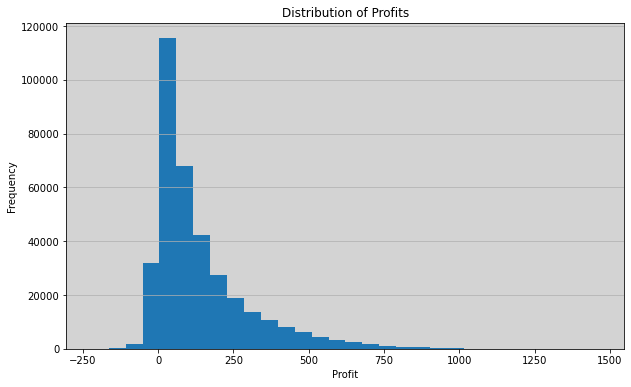

In [44]:
# Plotting the distribution of Profits to see how they are distributed
plt.figure(figsize=(10, 6))
plt.hist(merged_df["Profit"], bins=30)
plt.title("Distribution of Profits")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.90)
plt.gca().set_facecolor('LightGrey')
plt.show()

In [45]:
average_prices=merged_df.groupby(['Company'])['price per KM'].mean().reset_index()
average_prices

,Company,price per KM
0,Pink Cab,13.768510
1,Yellow Cab,20.306073


In [46]:
average_profits=merged_df.groupby('Company')['profit per KM'].mean().reset_index()
average_profits

,Company,profit per KM
0,Pink Cab,2.769908
1,Yellow Cab,7.105508


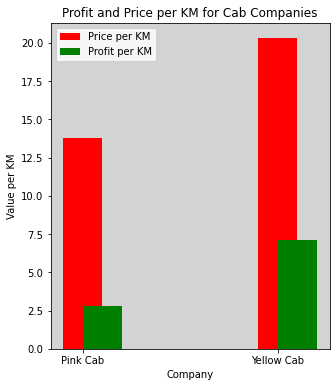

In [47]:
df=pd.merge(average_profits,average_prices,on='Company')
fig, ax = plt.subplots(figsize=(5, 6))

# Bar plot for price per KM
ax.bar(df['Company'], df['price per KM'],width=0.2 ,label='Price per KM', align='center',color='Red')

# Bar plot for profit per KM
ax.bar(df['Company'], df['profit per KM'], width=0.2, label='Profit per KM', align='edge',color='Green')

# Adding labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Value per KM')
ax.set_title('Profit and Price per KM for Cab Companies')

# Adding legend
ax.legend()
plt.gca().set_facecolor('LightGrey')

# Displaying the plot
plt.show()

In [48]:
average_prices_1=merged_df.groupby(['Company','Year'])['price per KM'].mean().reset_index()
average_prices_1
average_profits_1=merged_df.groupby(['Company','Year'])['profit per KM'].mean().reset_index()
average_profits_1

df=pd.merge(average_profits_1,average_prices_1,on=['Company','Year'])
df

,Company,Year,profit per KM,price per KM
0,Pink Cab,2016,3.026813,14.019628
1,Pink Cab,2017,2.962883,13.961471
2,Pink Cab,2018,2.350447,13.354016
3,Yellow Cab,2016,7.489847,20.691080
4,Yellow Cab,2017,7.494612,20.697927
5,Yellow Cab,2018,6.364805,19.561922


# Distribution of Payment Modes
   - This plot visualizes the distribution of payment modes (like Cash and Card) used by each cab company (Yellow Cab and Pink Cab), allowing for easy comparison and insights into customer payment preferences across companies.

Payment Counts:
 Payment_Mode     Company    Card    Cash
0               Pink Cab   50719   33992
1             Yellow Cab  164785  109896


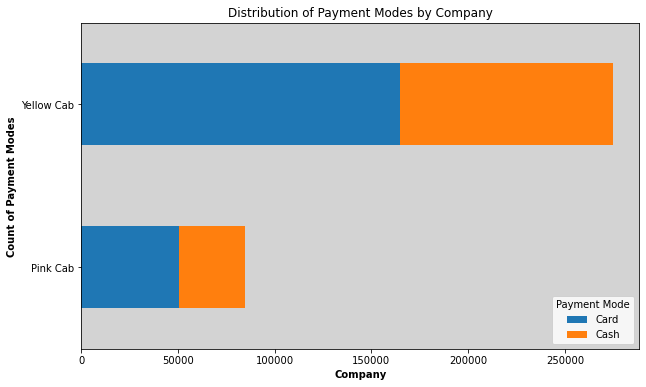

In [49]:
# Count payment modes for each company
payment_counts = merged_df.groupby(['Company', 'Payment_Mode']).size().unstack(fill_value=0)

# Print the payment counts to verify
print("Payment Counts:\n", payment_counts.reset_index())

# Plot the data
payment_counts.plot(kind='barh', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Company', fontweight='bold')
plt.ylabel('Count of Payment Modes', fontweight='bold')
plt.title('Distribution of Payment Modes by Company')
plt.legend(title='Payment Mode')
plt.gca().set_facecolor('LightGrey')
plt.show()

# Total Users by City
This visual analysis helps understand the distribution of cab service users across different cities, highlighting which cities have higher or lower user counts based on the merged dataset.we can say that:
- cities such as **New York, NY** and **Chicago, IL** have significantly **higher** numbers of cab service users compared to other cities.

City Users:
               City  Users
0      NEW YORK NY  99885
1       CHICAGO IL  56625
2   LOS ANGELES CA  48033
3    WASHINGTON DC  43737
4        BOSTON MA  29692
5     SAN DIEGO CA  20488
6   SILICON VALLEY   8519
7       SEATTLE WA   7997
8       ATLANTA GA   7557
9        DALLAS TX   7017
10        MIAMI FL   6454
11       AUSTIN TX   4896
12   ORANGE COUNTY   3982
13       DENVER CO   3825
14    NASHVILLE TN   3010
15   SACRAMENTO CA   2367
16      PHOENIX AZ   2064
17       TUCSON AZ   1931
18   PITTSBURGH PA   1313


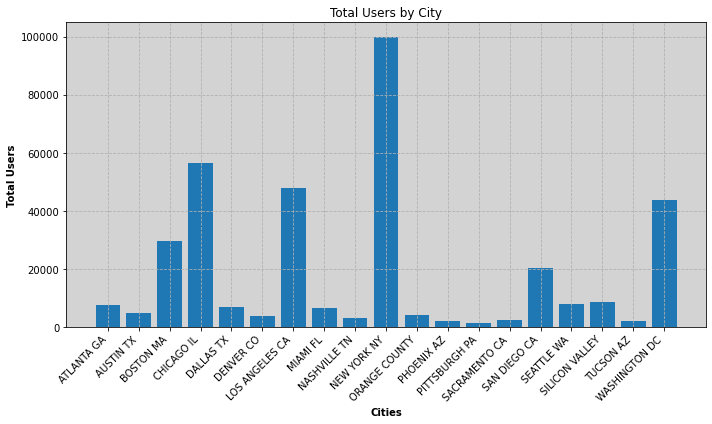

In [50]:
# Group by City and sum the Users
city_users = merged_df.groupby('City')['Users'].count().reset_index()

# Print the results to verify
print("City Users:\n", city_users.sort_values(by='Users',ascending=False).reset_index(drop=True))

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(city_users['City'], city_users['Users'])
plt.xlabel('Cities', fontweight='bold')
plt.ylabel('Total Users', fontweight='bold')
plt.title('Total Users by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(ls='--')
plt.gca().set_facecolor('LightGrey')
# Show the plot
plt.show()

# Cab Usage Across Different Age Groups
This scatter plot visualizes the distribution of cab usage across different age groups, highlighting the demographics of cab service users based on the merged dataset.we can say that
- Users aged between **20** and **40** years old show **higher** cab usage compared to those aged **40** and **above**.

Age group with highest cab usage:
   Age         Users
0   23  2.010135e+09
1   20  1.997905e+09
2   27  1.996650e+09
3   33  1.917648e+09
4   32  1.906044e+09


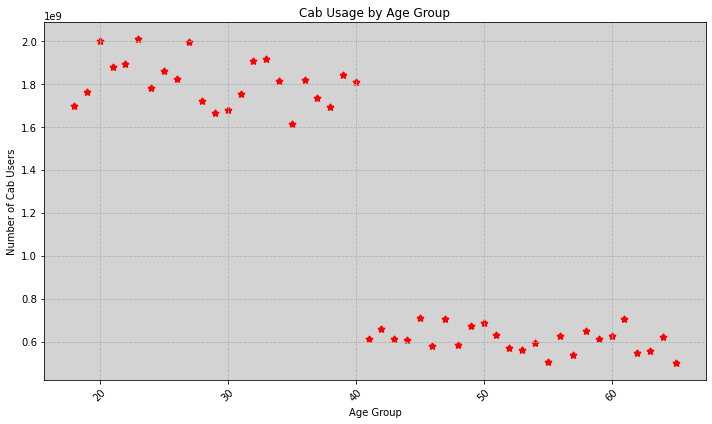

In [51]:
# Group by 'age' and calculate the sum of 'users'
age_group_usage = merged_df.groupby('Age')['Users'].sum().reset_index()

# Sort the age groups by the number of users (descending order)
age_group_usage = age_group_usage.sort_values(by='Users', ascending=False)

# Display the age group with the highest cab usage
print("Age group with highest cab usage:")
print(age_group_usage.reset_index(drop=True).head())

# Plotting the age group vs users
plt.figure(figsize=(10, 6))
#plt.bar(age_group_usage['Age'], age_group_usage['Users'], color='skyblue')
plt.scatter(age_group_usage['Age'], age_group_usage['Users'],color='red',marker='*',lw=2)
plt.xlabel('Age Group')
plt.ylabel('Number of Cab Users')
plt.title('Cab Usage by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(ls='--')
plt.gca().set_facecolor('LightGrey')
plt.show()

# Hypothesis Testing

### Steps
#### 1. Define the following:
- Null Hypothesis (H0) : statement asserting that there is no effect or no difference.
- Alternative Hypothesis (H1) : statement suggesting that there is an effect or a difference.

#### 2. Find the p-value
- Since the population standard deviation(sigma) is unknown, we use the t-distribution.
- Calculate the test statistic and corresponding p-value using the sample data.

#### 3. Reject or Fail to Reject the Hypothesis
- Compare the p-value with the significance level (alpha), typically set at 0.05.

 **Decision Rule**:
  - If \(p\)-value < (alpha): Reject the null hypothesis (H0).
  - If \(p\)-value > (alpha): Fail to reject the null hypothesis (H0).

**Conclusion**: Based on the decision rule, determine if there is enough evidence to conclude that there is a significant difference.


In [52]:
# Separate the data by company and storing them into two dataframes
Yellow_Cab_company = merged_df[merged_df['Company'] == 'Yellow Cab']
Pink_Cab_company = merged_df[merged_df['Company'] == 'Pink Cab']

# 1.Profitability Comparison:

### Hypothesis Testing to Determine if Yellow Cab is More Profitable

- **Null Hypothesis (Ho)**: Yellow Cab is not more profitable than Pink Cab.
- **Alternative Hypothesis (H1)**:Yellow Cab is more profitable than Pink Cab.

In [53]:
# Calculate the mean profit for both companies
mean_profit_Yellow_Cab = Yellow_Cab_company['Profit'].mean()
mean_profit_Pink_Cab = Pink_Cab_company['Profit'].mean()

# Perform a t-test to compare the profitability
t_stat, p_value = stats.ttest_ind(Yellow_Cab_company['Profit'], Pink_Cab_company['Profit'],equal_var=False)
print(f'Profitability Comparison:\nMean Profit A: {mean_profit_Yellow_Cab}\nMean Profit B: {mean_profit_Pink_Cab}\nT-Statistic: {t_stat}\nP-Value: {p_value}\n')

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject null hypothesis: Yellow_Cab is more profitable than Pink_Cab.")
else:
    print("Fail to reject null hypothesis: Yellow_Cabis not more profitable than Pink_Cab.")

Profitability Comparison:
Mean Profit A: 160.2599858410308
Mean Profit B: 62.65217410962055
T-Statistic: 230.99551452746326
P-Value: 0.0

Reject null hypothesis: Yellow_Cab is more profitable than Pink_Cab.


# 2.Customer Usage

### Customers of yellow cab use the service more frequently (km traveled) than those of pink cab.

- **Null Hypothesis (Ho)**: There is no difference in the mean kilometers traveled by customers of yellow cab and Pink cab.
- **Alternative Hypothesis (H1)**:There is a difference in the mean kilometers traveled by customers of yellow cab and Pink cab.

In [54]:
mean_km_Yellow_Cab = Yellow_Cab_company['KM Travelled'].mean()
mean_km_Pink_Cab = Pink_Cab_company['KM Travelled'].mean()

# Perform a t-test to compare the kilometers traveled
t_stat_km, p_value_km = stats.ttest_ind(Yellow_Cab_company['KM Travelled'], Pink_Cab_company['KM Travelled'])
print(f'Customer Usage:\nMean KM A: {mean_km_Yellow_Cab}\nMean KM B: {mean_km_Pink_Cab}\nT-Statistic: {t_stat_km}\nP-Value: {p_value_km}\n')


alpha = 0.05
if p_value_km < alpha:
    print('we Reject the null hypothesis: There is sufficient evidence to suggest a statistically significant difference in mean KM traveled.')
else:
    print('Fail to reject the null hypothesis: There is not enough evidence to suggest a statistically significant difference in mean KM traveled.')

Customer Usage:
Mean KM A: 22.56951689414197
Mean KM B: 22.559916775861275
T-Statistic: 0.19967531052842344
P-Value: 0.8417346372229664

Fail to reject the null hypothesis: There is not enough evidence to suggest a statistically significant difference in mean KM traveled.


# 3.Income
### Does Income effect the choice of cab company?

- **Null Hypothesis (Ho)**: The mean income of users of yellow cab is equal to the mean income of users of Pink cab.
- **Alternative Hypothesis (H1)**:The mean income of users of yellow cab is different from the mean income of users of Pink cab.


In [55]:
mean_income_a=Yellow_Cab_company['Income (USD/Month)'].mean()
mean_income_b=Pink_Cab_company['Income (USD/Month)'].mean()

# Perform a t-test to compare the mean income of users between the two companies
t_stat_income, p_value_income = stats.ttest_ind(Yellow_Cab_company['Income (USD/Month)'], Pink_Cab_company['Income (USD/Month)'])
print(f'Income Comparison:\nMean Income A: {mean_income_a}\nMean Income B: {mean_income_b}\nT-Statistic: {t_stat_income}\nP-Value: {p_value_income}\n')

alpha = 0.05
if p_value_income < alpha:
    print('We reject the null hypothesis:There is sufficient evidence to suggest a statistically significant difference in mean income.')
else:
    print('we fail to reject the null hypothesis:There is not enough evidence to suggest a statistically significant difference in mean \n income.')

Income Comparison:
Mean Income A: 15045.669816987705
Mean Income B: 15059.04713673549
T-Statistic: -0.42711269788899975
P-Value: 0.6692975005750657

we fail to reject the null hypothesis:There is not enough evidence to suggest a statistically significant difference in mean 
 income.


# 4.Gender
### Does Gender effect the choice of cab company?

- **Null Hypothesis (Ho)**: There is no association between Gender and Company.
- **Alternative Hypothesis (H1)**:There is an association between Gender and Company.

**Note:** We use the chi-square test to see if there's a connection between two types of categories.In this case, the two categorical variables are gender (e.g., male, female) and cab company preference (e.g., Company A, Company B). The chi-square test helps determine whether the distribution of one categorical variable differs depending on the level of the other categorical variable.

In [56]:
# Creating a cross-table with count of each gender for each compny
Cross_Table= pd.crosstab(merged_df['Gender'], merged_df['Company'])
print("\nCross_Table:\n", Cross_Table)


Cross_Table:
 Company  Pink Cab  Yellow Cab
Gender                       
Female      37480      116000
Male        47231      158681


In [57]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(Cross_Table)
print(f'\nChi-Square Test Results:\nChi2 Statistic: {chi2}\nP-Value: {p}\n')

alpha = 0.05
# Interpret the results
if p < alpha:
    print('We reject the null hypothesis: There is sufficient evidence to suggest that Gender and Company are associated.')
else:
    print('Fail to reject the null hypothesis: There is not enough evidence to suggest that Gender and Company are associated.')


Chi-Square Test Results:
Chi2 Statistic: 107.22063897254299
P-Value: 3.982674650131372e-25

We reject the null hypothesis: There is sufficient evidence to suggest that Gender and Company are associated.


# 5.Demographic Preference
### Is Yellow cab is preferred by younger users compared to Pink cab ?

- **Null Hypothesis (Ho)**: There is no significant difference in the mean ages of younger users (defined as ages 10-30) between yellow cab and Pink cab.
- **Alternative Hypothesis (H1)**:There is a significant difference in the mean ages of younger users between yellow cab and Pink cab.


In [58]:
# Defining age group for younger users (e.g., ages 10-30)
young_age_group = merged_df[(merged_df['Age'] >= 10) & (merged_df['Age'] <= 30)]
young_age_group.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,month_name,Profit,price per KM,profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Card,Male,28,10813,2016,January,57.3150,12.182266,1.882266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885.0,24701.0,29290,Cash,Male,28,10813,2018,July,281.2772,22.859870,10.739870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885.0,24701.0,29290,Card,Male,28,10813,2018,November,194.6480,18.614571,4.574571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Card,Male,27,9237,2016,January,23.6660,12.526904,0.826904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885.0,24701.0,27703,Card,Male,27,9237,2018,April,253.9808,19.821330,6.981330


In [59]:
# Separate the data by company within the defined age group
Yellow_cab_company = young_age_group[young_age_group['Company'] == 'Yellow Cab']
Pink_cab_company = young_age_group[young_age_group['Company'] == 'Pink Cab']

# Calculate the mean age for both companies within the defined age group
mean_age_a = Yellow_cab_company['Age'].mean()
mean_age_b = Pink_cab_company['Age'].mean()

# Perform a t-test to compare the mean ages of younger users between the two companies
t_stat_age, p_value_age = stats.ttest_ind(Yellow_cab_company['Age'], Pink_cab_company['Age'])
print(f'Age Comparison (Young Users):\nMean Age A (Young): {mean_age_a}\nMean Age B (Young): {mean_age_b}\nT-Statistic: {t_stat_age}\nP-Value: {p_value_age}\n')

# Interpretation
if p_value_age < 0.05:
    print("\nThere is a significant difference in the mean ages of younger users between yellow cab and Pink cab.")
    if mean_age_a < mean_age_b:
        print("yellow cab and Pink cab. is preferred by younger users compared to Pink cab.")
    else:
        print("Pink cab is preferred by younger users compared to yellow cab .")
else:
    print("\nThere is no significant difference in the mean ages of younger users between yellow cab and Pink cab.")


Age Comparison (Young Users):
Mean Age A (Young): 23.96671005162519
Mean Age B (Young): 23.944927291649087
T-Statistic: 0.9700336232319711
P-Value: 0.33203129650971674


There is no significant difference in the mean ages of younger users between yellow cab and Pink cab.
